# Seven wonders analysis

## Libraries and data

Scraping tool:
https://github.com/arruda/bgarena_analysis

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re
from sklearn.ensemble import RandomForestClassifier

In [2]:
from pdpbox import pdp, get_dataset, info_plots

In [3]:
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

In [4]:
xls = pd.ExcelFile('seven_wonders.xlsx')
df = pd.read_excel(xls, 'transpose')

## Data processing

In [5]:
vp_cols = ['VP from Treasury Contents','VP from Wonder','VP from Civilian Structures','VP from Scientific Structures','VP from Commercial Structures','VP from Guilds']

In [6]:
print('Game records = {}'.format(len(df['Board'].unique())))

Game records = 200


In [7]:
df['Ranking'] = df['Game result'].apply(lambda x: int(x[0]))
df['final_score'] = df['Game result'].apply(lambda x: int(re.search(r'\((.*?)\)',x).group(1)))
df['win_record'] = np.where(df['Ranking']==1,1,0)
df['VP_military'] = df['VP from Military Conflicts (Victory)'] + df['VP from Military Conflicts (Defeat)']
df['max_one_strategy'] = df[vp_cols].max(axis=1)
df['min_one_strategy'] = df[vp_cols].min(axis=1)
df['std_one_strategy'] = df[vp_cols].std(axis=1)
df['main_strategy'] = df[vp_cols].idxmax(axis=1)
df['min_strategy'] = df[vp_cols].idxmin(axis=1)

In [8]:
player_count = df[['Board', 'win_record']].groupby('Board').count().reset_index()
player_count.columns = ['Board', 'player_count']
df = df.merge(player_count, how='left', on='Board')

In [9]:
# Manual map of wonders

wonders = {'Wonder ID': list(range(1,15)), 
       'wonder_name': ['Gizah A', 'Babylon A', 'Olympia A', 'Rhodes A', 'Ephesos A', 'Alexandria A', 'Halikarnassos A',\
                      'Gizah B', 'Babylon B', 'Olympia B', 'Rhodes B', 'Ephesos B', 'Alexandria B', 'Halikarnassos B']}

wonders_map = pd.DataFrame(data = wonders)
df = df.merge(wonders_map, on='Wonder ID')

## Simple EDA

In [24]:
df.head()

,User,Game result,Thinking time,VP from Military Conflicts (Victory),VP from Military Conflicts (Defeat),VP from Treasury Contents,VP from Wonder,VP from Civilian Structures,VP from Scientific Structures,VP from Commercial Structures,VP from Guilds,Constructed stages of the Wonder,Cards discarded,Chained constructions,Coins spent on commerce,Coins gained through commerce,Shields,Wonder side A,Wonder ID,Civilian Structures,Scientific Structures,Guilds,Military Structures,Commercial Structures,Raw Materials,Manufactured Goods,Board,Ranking,final_score,win_record,VP_military,max_one_strategy,min_one_strategy,std_one_strategy,main_strategy,min_strategy,player_count,wonder_name
1045,mfgriffin,3rd (46),0.536111,6,-4,9,10,13,0,3,9,3,2,0,16,12,4,yes,5,3,0,1,2,2,3,2,67982174,3,46,0,2,13,0,4.844241,VP from Civilian Structures,VP from Scientific Structures,3,Ephesos A
501,Burp_7,1st (56),0.507639,3,-5,5,5,18,1,7,22,3,0,4,9,16,2,no,10,4,1,2,1,5,2,0,67982174,1,56,1,-2,22,1,8.334667,VP from Guilds,VP from Scientific Structures,3,Olympia B
406,wayne_rumacchia,2nd (50),0.459722,18,0,3,7,22,0,0,0,3,4,0,12,9,7,no,13,4,0,0,4,0,3,0,67982174,2,50,0,18,22,0,8.617811,VP from Civilian Structures,VP from Scientific Structures,3,Alexandria B
633,mfgriffin,2nd (49),0.545833,9,-2,3,10,16,10,3,0,3,0,4,17,3,6,no,12,3,3,0,3,3,3,0,67985455,2,49,0,7,16,0,6.000000,VP from Civilian Structures,VP from Guilds,3,Ephesos B
981,Burp_7,3rd (42),0.529861,0,-6,6,10,23,9,0,0,3,0,2,5,18,0,yes,7,4,3,0,0,3,4,2,67985455,3,42,0,-6,23,0,8.508819,VP from Civilian Structures,VP from Commercial Structures,3,Halikarnassos A


In [ ]:
df['win_record'] = np.where(df['Ranking']==1,1,0)


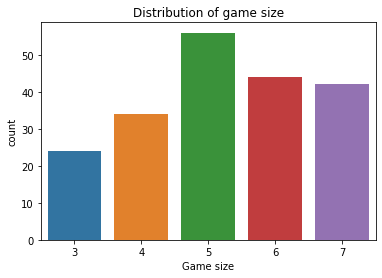

In [10]:
# Number of players

game_size = df[['Board','Wonder ID']].groupby('Board').count()
game_size.columns = ['Game size']
ax = sns.countplot(data=game_size, x='Game size')
ax.title.set_text('Distribution of game size')

Mean score: 50.541108986615676


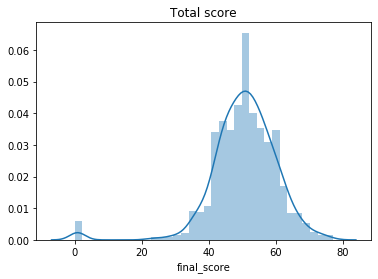

In [11]:
print('Mean score: {}'.format(df['final_score'].mean()))
ax = sns.distplot(df['final_score'])
ax.title.set_text('Total score')

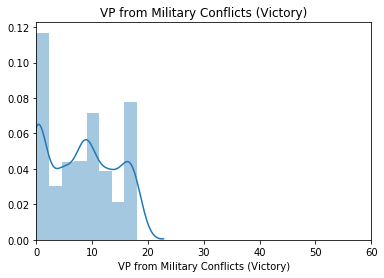

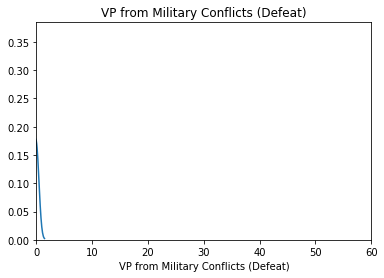

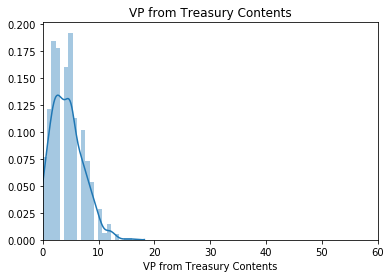

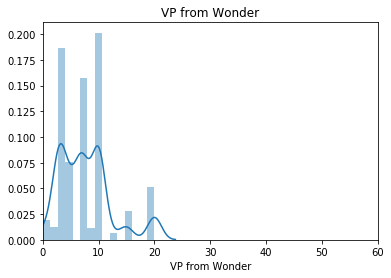

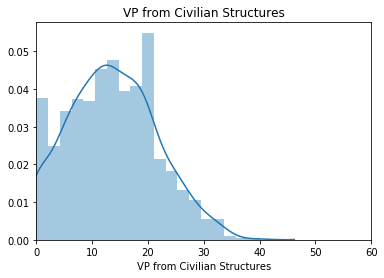

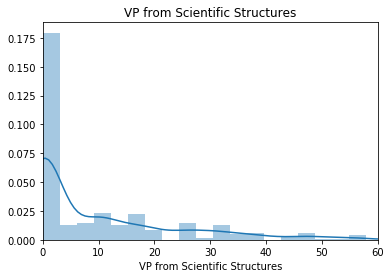

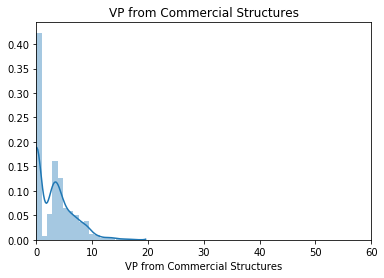

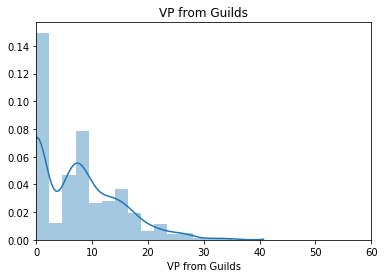

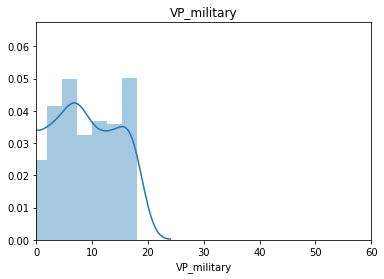

TypeError: unsupported operand type(s) for /: 'str' and 'int'

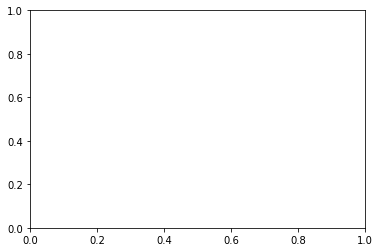

In [23]:
for a in vp_cols:
    ax = sns.distplot(df[a])
    ax.title.set_text(a)
    ax.set(xlim=(0, 60))
    plt.show()

In [13]:
df[['wonder_name', 'Wonder ID', 'final_score', 'win_record']].groupby(['Wonder ID','wonder_name']).agg(['mean', 'count']).sort_values(by=('win_record','mean'), ascending=False)

final_score       win_record      
                                 mean count       mean count
Wonder ID wonder_name                                       
3         Olympia A         50.346154    52   0.250000    52
1         Gizah A           52.195652    46   0.239130    46
14        Halikarnassos B   51.927928   111   0.234234   111
10        Olympia B         51.168421    95   0.231579    95
13        Alexandria B      52.165354   127   0.228346   127
4         Rhodes A          49.325000    40   0.225000    40
12        Ephesos B         51.431818   132   0.212121   132
8         Gizah B           49.612903    93   0.204301    93
11        Rhodes B          51.699187   123   0.186992   123
9         Babylon B         48.364486   107   0.177570   107
6         Alexandria A      47.538462    26   0.115385    26
2         Babylon A         48.166667    42   0.095238    42
7         Halikarnassos A   46.466667    30   0.066667    30
5         Ephesos A         47.000000    22   0.045455    22

In [14]:
vp_cols = list(df.columns[df.columns.str.contains("VP")]) +['wonder_name']
df[vp_cols].groupby('wonder_name').mean()

,VP from Military Conflicts (Victory),VP from Military Conflicts (Defeat),VP from Treasury Contents,VP from Wonder,VP from Civilian Structures,VP from Scientific Structures,VP from Commercial Structures,VP from Guilds,VP_military
wonder_name,,,,,,,,,
Alexandria A,7.846154,-2.538462,3.923077,8.153846,13.538462,6.846154,2.846154,9.192308,5.307692
Alexandria B,8.519685,-2.157480,4.393701,6.448819,16.086614,7.992126,2.582677,8.488189,6.362205
Babylon A,3.047619,-3.761905,3.071429,6.928571,9.761905,23.476190,2.047619,3.595238,-0.714286
Babylon B,5.383178,-3.242991,4.009346,3.000000,11.420561,17.551402,4.242991,6.953271,2.140187
Ephesos A,6.363636,-3.181818,5.318182,9.227273,14.318182,7.045455,2.545455,5.363636,3.181818
Ephesos B,6.613636,-2.803030,5.075758,9.265152,13.575758,11.689394,2.303030,6.310606,3.810606
Gizah A,8.782609,-2.369565,4.130435,13.760870,15.152174,2.304348,4.173913,6.260870,6.413043
Gizah B,6.666667,-2.860215,4.559140,17.666667,12.677419,1.204301,4.290323,6.881720,3.806452
Halikarnassos A,7.966667,-2.166667,4.033333,8.600000,12.166667,10.633333,3.133333,4.000000,5.800000


In [15]:
# Main general strategies

summary = df[['wonder_name', 'main_strategy','win_record']].groupby(['wonder_name', 'main_strategy']).count().reset_index()
summary.pivot(index='wonder_name', columns='main_strategy', values='win_record')

main_strategy,VP from Civilian Structures,VP from Commercial Structures,VP from Guilds,VP from Scientific Structures,VP from Treasury Contents,VP from Wonder
wonder_name,,,,,,
Alexandria A,17.0,NaN,5.0,3.0,NaN,1.0
Alexandria B,75.0,NaN,20.0,30.0,1.0,1.0
Babylon A,9.0,NaN,1.0,29.0,NaN,3.0
Babylon B,35.0,3.0,12.0,55.0,2.0,NaN
Ephesos A,13.0,NaN,2.0,6.0,NaN,1.0
Ephesos B,59.0,1.0,17.0,42.0,5.0,8.0
Gizah A,26.0,NaN,5.0,3.0,NaN,12.0
Gizah B,18.0,NaN,8.0,3.0,NaN,64.0
Halikarnassos A,14.0,NaN,2.0,11.0,NaN,3.0


In [16]:
# Main winning strategies

summary = df[['wonder_name', 'main_strategy','win_record']][df.win_record == 1].groupby(['wonder_name', 'main_strategy']).count().reset_index()
summary.pivot(index='wonder_name', columns='main_strategy', values='win_record')

main_strategy,VP from Civilian Structures,VP from Guilds,VP from Scientific Structures,VP from Treasury Contents,VP from Wonder
wonder_name,,,,,
Alexandria A,1.0,1.0,1.0,NaN,NaN
Alexandria B,18.0,7.0,3.0,NaN,1.0
Babylon A,NaN,NaN,4.0,NaN,NaN
Babylon B,2.0,3.0,13.0,1.0,NaN
Ephesos A,NaN,NaN,1.0,NaN,NaN
Ephesos B,12.0,8.0,6.0,1.0,1.0
Gizah A,5.0,2.0,1.0,NaN,3.0
Gizah B,5.0,1.0,NaN,NaN,13.0
Halikarnassos A,1.0,NaN,1.0,NaN,NaN


## Simple predictive model

In [17]:
# Order by boards to avoid train/test split within games
df.sort_values(by='Board', inplace=True)

df_train = df.iloc[0:400,:][['Board','Wonder ID', 'player_count']].reset_index(drop=True)
df_test = df.iloc[400:,:][['Board','Wonder ID', 'player_count']].reset_index(drop=True)

y_train = df.iloc[0:400,:][['win_record']].reset_index(drop=True)
y_test = df.iloc[400:,:][['win_record']].reset_index(drop=True)

In [18]:
model = RandomForestClassifier()
model.fit(df_train, y_train)
model.score(df_test, y_test)

0.7043343653250774

In [19]:
# Ouput predictions

df_pred = pd.DataFrame(model.predict_proba(df_train))
results = pd.concat([df_train, df_pred], axis=1)
results = results.merge(wonders_map, on='Wonder ID')

In [20]:
results[['wonder_name',1]].groupby('wonder_name').mean().sort_values(by=1, ascending=False)

,1
wonder_name,
Alexandria B,0.276190
Halikarnassos B,0.273684
Ephesos B,0.256522
Gizah B,0.248571
Rhodes A,0.244000
Gizah A,0.240909
Rhodes B,0.213889
Halikarnassos A,0.166667
Alexandria A,0.161111


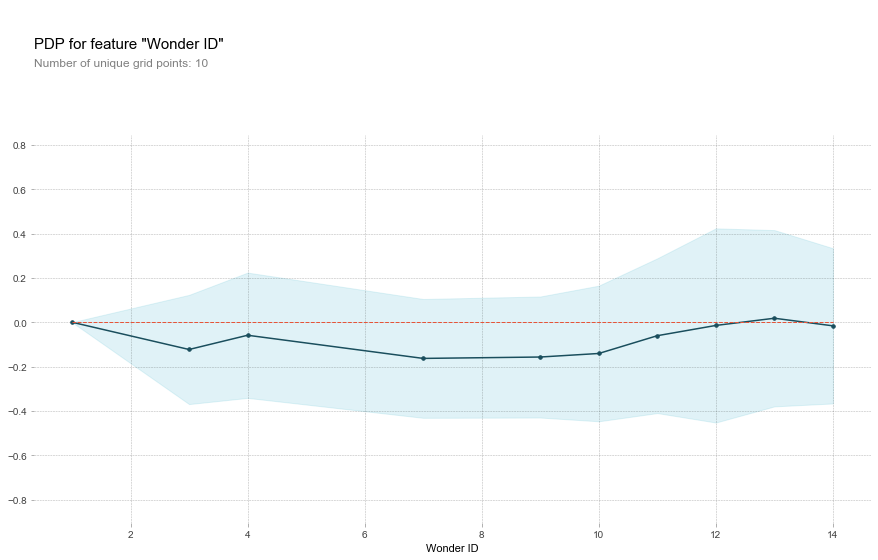

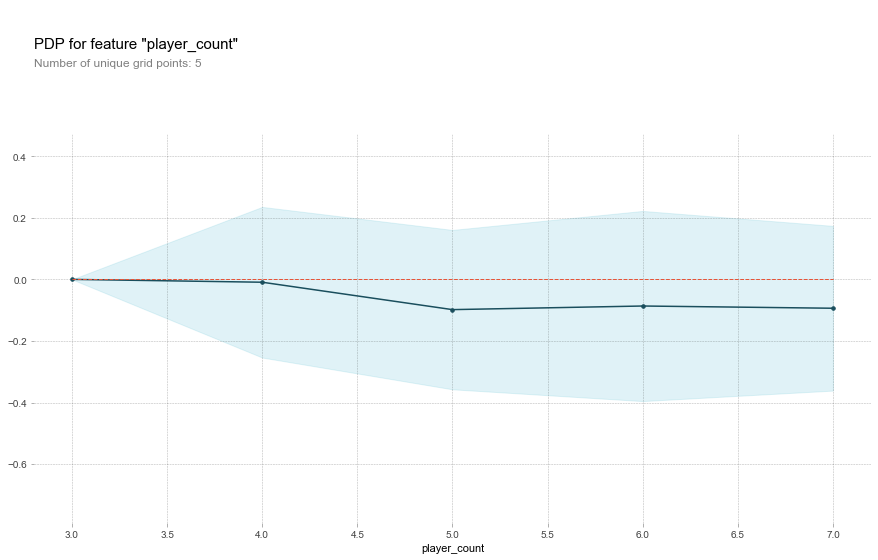

In [22]:
# Partial dependence plots

for test_feature in ['Wonder ID', 'player_count']:
    pdp_success = pdp.pdp_isolate(model=model, dataset=df_train, model_features=df_train.columns, feature=test_feature)
    pdp.pdp_plot(pdp_success, test_feature)
  #pdp.info_plots.target_plot(pdp_success, test_feature)
    plt.show()